Научимся:

* Искать null-значения и дубликаты
*  Аггрегировать данные (как в SQL 😏  )
*  Сортировать данные
*  Строить сводные таблицы (как в Excel 😏 )
* Объединять датафреймы
*  Строить простые графики 




Найдем самых лояльных покупателей

Построим сводную таблицу по пользователям 

Разделим покупателей на когорты

*Посмотрим,как строится retention по когортам

 


In [0]:
import pandas as pd
import seaborn as sns

In [0]:
#читаем данные из csv, который находится в zip-файле на github
#с параметрами read_csv можно ознакомиться https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

url = 'https://github.com/daryamukh/Python-for-data-analysis/blob/master/ecommerce-data.zip?raw=true'
df = pd.read_csv(url , encoding='ISO-8859-1',compression='zip')

In [0]:
# предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [0]:
#last 5 rows pandas dataframe
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [0]:
# позволяет собрать некоторую статистику по каждому числовому признаку
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
# позволяет вывести общую информацию 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Null

In [0]:
#аналог where / order by / limit в sql 
df[df.CustomerID.isnull()].sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [0]:
#оставляем данные только с заполненным id пользователя  и ненулевыми ценами за товар
df=df[(df.CustomerID.notnull()) & (df.UnitPrice!=0)]

## Duplicates

In [0]:
df.duplicated().sum()


5225

In [0]:
df.shape

(406789, 8)

In [0]:
#pandas inplace=True
df.drop_duplicates(inplace=True)
df.shape

(401564, 8)

##Тип данных

In [0]:
df.CustomerID = df.CustomerID.astype('int64')


In [0]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)

## **Страны** 

In [0]:
#транзакции по странам, сортировка по умолчанию
df.Country.value_counts().head()

United Kingdom    356704
Germany             9478
France              8474
EIRE                7473
Spain               2527
Name: Country, dtype: int64

In [0]:
#нам нужен аналог count distinct в pandas - nunique()
#groupby работает аналогично операции GROUP BY в SQL и позволяет группировать данные, вычисляя затем агрегированные показатели в каждой группе.
countries=df.groupby(by='Country').CustomerID.nunique().sort_values(ascending=False)
countries.head()

Country
United Kingdom    3949
Germany             95
France              87
Spain               31
Belgium             25
Name: CustomerID, dtype: int64

## **Выручка**

In [0]:
#создадим новый столбец
df['Revenue']=df['Quantity']*df['UnitPrice']
#добавим месяц покупки
# гуглим, что делает dt.strftime('%Y - %m')
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


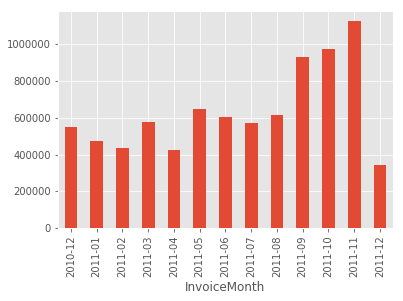

In [0]:
#выручка по месяцам
df.groupby(['InvoiceMonth'])['Revenue'].sum().plot(kind='bar')

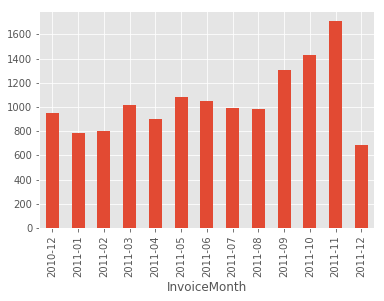

In [0]:
#уникальные покупатели по месяцам
df.groupby(['InvoiceMonth'])['CustomerID'].nunique().plot(kind='bar')

In [0]:
#сводная таблица выручка по пользователям
table=pd.pivot_table(df[df.Country=='Australia'], index=['Country','CustomerID'], columns='InvoiceMonth', aggfunc=sum, values='Revenue',fill_value=0 )


cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm)

#table.style.highlight_max(axis=1)

In [0]:
type(table)

pandas.core.frame.DataFrame

## **Покупатели**

In [0]:
products=df.copy()
products=products[products.Country=='Australia'].groupby(by=['Country','CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
products=products.groupby(by=['Country','CustomerID']).agg({'InvoiceNo': ['count'], 'Revenue': ['sum','mean']})
products

InvoiceNo    Revenue             
                         count        sum         mean
Country   CustomerID                                  
Australia 12386              2     401.90   200.950000
          12388              6    2780.66   463.443333
          12393              4    1582.60   395.650000
          12415             26  123725.45  4758.671154
          12422              2     386.20   193.100000
          12424              2    1760.96   880.480000
          12431             16    5376.11   336.006875
          12434              4     765.19   191.297500
          16321              7     230.70    32.957143

In [0]:
table_plus = pd.merge(table,products,  on=['Country','CustomerID'])  
table_plus.style.background_gradient(cmap=cm)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


**Топ-5 лояльных покупателей**

In [0]:
frequency_df = df[df.Quantity>0].copy()
frequency_df = frequency_df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.sort_values(ascending=False, inplace=True)
frequency_df.head(10)

CustomerID
12748    209
14911    201
17841    124
13089     97
14606     93
15311     91
12971     86
14646     73
16029     63
13408     62
Name: InvoiceNo, dtype: int64

**Выделим когорты**

In [0]:
#месяц первой покупки 
cohorts= df.groupby('CustomerID',as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns = {'InvoiceMonth':'Cohort'},inplace=True)
cohorts.head()

,CustomerID,Cohort
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02


In [0]:
#аналог left join в sql
df_merged= pd.merge(df,cohorts , how='left', on='CustomerID')
df_merged.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,Cohort
68614,545288,20725,LUNCH BAG RED RETROSPOT,100,2011-03-01 11:48:00,1.45,15311,United Kingdom,145.0,2011-03,2010-12


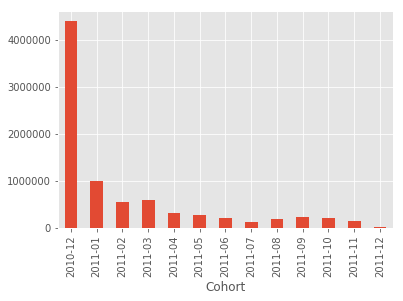

In [0]:
df_merged.groupby(['Cohort'])['Revenue'].sum().plot(kind='bar') 
#добавить условие

## Retention

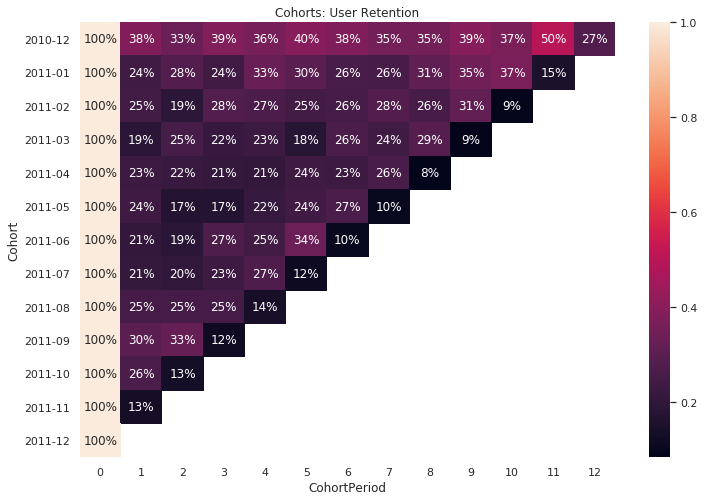

In [0]:
import numpy as np
from matplotlib import pyplot as plt

def cohort_period(df):
  """
  Creates column CohortPeriod
  """
  df['CohortPeriod'] = np.arange(len(df))
  return df
 

cohorts = df_merged.groupby(['Cohort', 'InvoiceMonth']).agg({'CustomerID': pd.Series.nunique})
cohorts.rename(columns={'CustomerID': 'TotalUsers',
                        'InvoiceNo': 'TotalOrders'}, inplace=True)
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### Средний чек

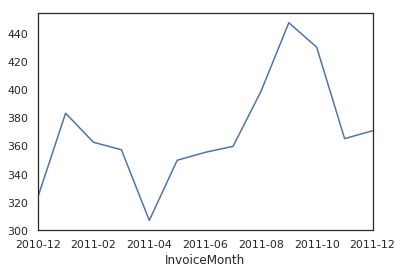

In [0]:
aov = df.groupby(df['InvoiceMonth'])['Revenue'].sum().divide(df.groupby(df['InvoiceMonth'])['InvoiceNo'].nunique() )
aov.plot() 

## Сегменты товаров по стоимости

In [0]:
def price_segment(row):
    if row <5:
        return 'cheap' 
    if row >=5 and row<100:
        return 'middle'
    if row >=100:
        return 'expensive'
 

df['PriceSegment'] = df[df.Quantity>0]['UnitPrice'].apply(price_segment)
df.groupby('PriceSegment')['StockCode'].nunique()

PriceSegment
cheap        3251
expensive      11
middle        878
Name: StockCode, dtype: int64

План Б

In [0]:
#Вариант для загрузки файла
# скачиваем данные на комп и загружаем их в колаб
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
import pandas as pd
url = 'https://github.com/daryamukh/Python-for-data-analysis/blob/master/ecommerce-data.zip?raw=true'
df = pd.read_csv(url  ,encoding='ISO-8859-1', compression='zip')
#готовим данные, меняем типы, создаем новые столбцы
df=df[(df.CustomerID.notnull()) & (df.UnitPrice!=0)]
df.drop_duplicates(inplace=True)
df.CustomerID  = df.CustomerID.astype('int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue']=df['Quantity']*df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 